<a href="https://colab.research.google.com/github/nguyenhungne/crawl-analysis-data/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Clouds <a id="8"></a>


`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

**Import Primary Libraries**

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

First, let's install the package.

In [2]:
# install wordcloud
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

Crawl data from `https://tuyensinh.ueh.edu.vn/bai-viet/chuyen-nganh-cong-nghe-thiet-ke-thong-tin-va-truyen-thong-thac-si-huong-ung-dung/` about the major Information Design and Communication Technology

In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://tuyensinh.ueh.edu.vn/bai-viet/chuyen-nganh-cong-nghe-thiet-ke-thong-tin-va-truyen-thong-thac-si-huong-ung-dung/"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

content_divs = soup.find_all('div', class_='elementor-widget-wrap elementor-element-populated')

with open("ChuyenTrinh.txt", "w", encoding="utf-8") as file:
    for div in content_divs:
        text = div.get_text(separator=" ")
        clean_text = ' '.join(text.split())
        file.write(clean_text + "\n\n")

print("Text has been successfully extracted and saved to ChuyenTrinh.txt")

Text has been successfully extracted and saved to ChuyenTrinh.txt


Open Chuyentrinh.txt

In [9]:
with open('ChuyenTrinh.txt', 'r', encoding='utf-8') as file:
    data_to_analysis = file.read()

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [10]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [11]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(data_to_analysis)

Awesome! Now that the `word` cloud is created, let's visualize it.

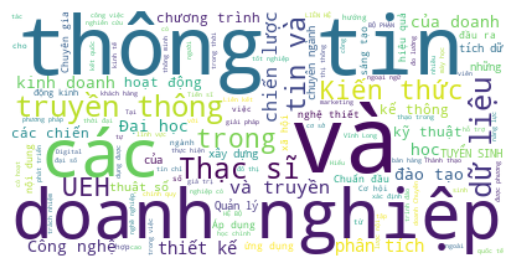

In [12]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

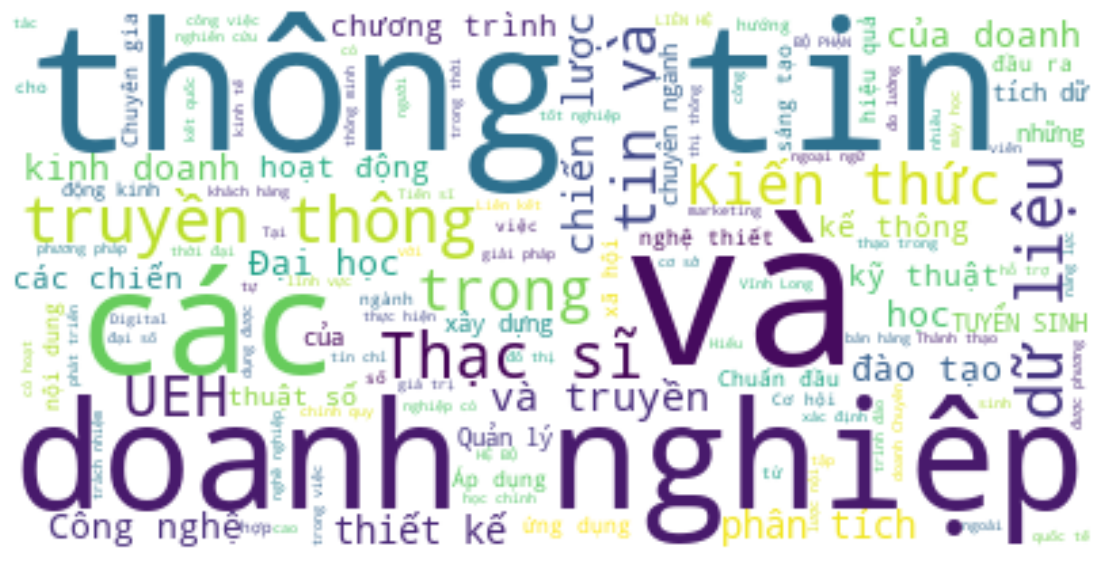

In [13]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

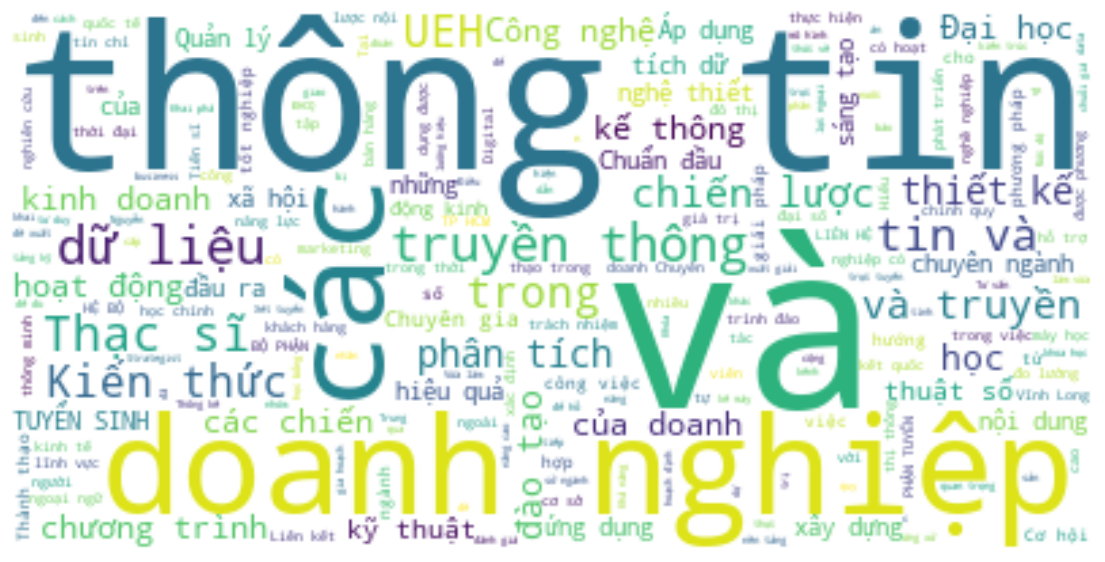

In [14]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(data_to_analysis)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it *alice_mask.png*.

In [15]:
# download image
!curl -o alice_mask.png https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png

# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  7339  100  7339    0     0   3735      0  0:00:01  0:00:01 --:--:--  3740


Let's take a look at how the mask looks like.

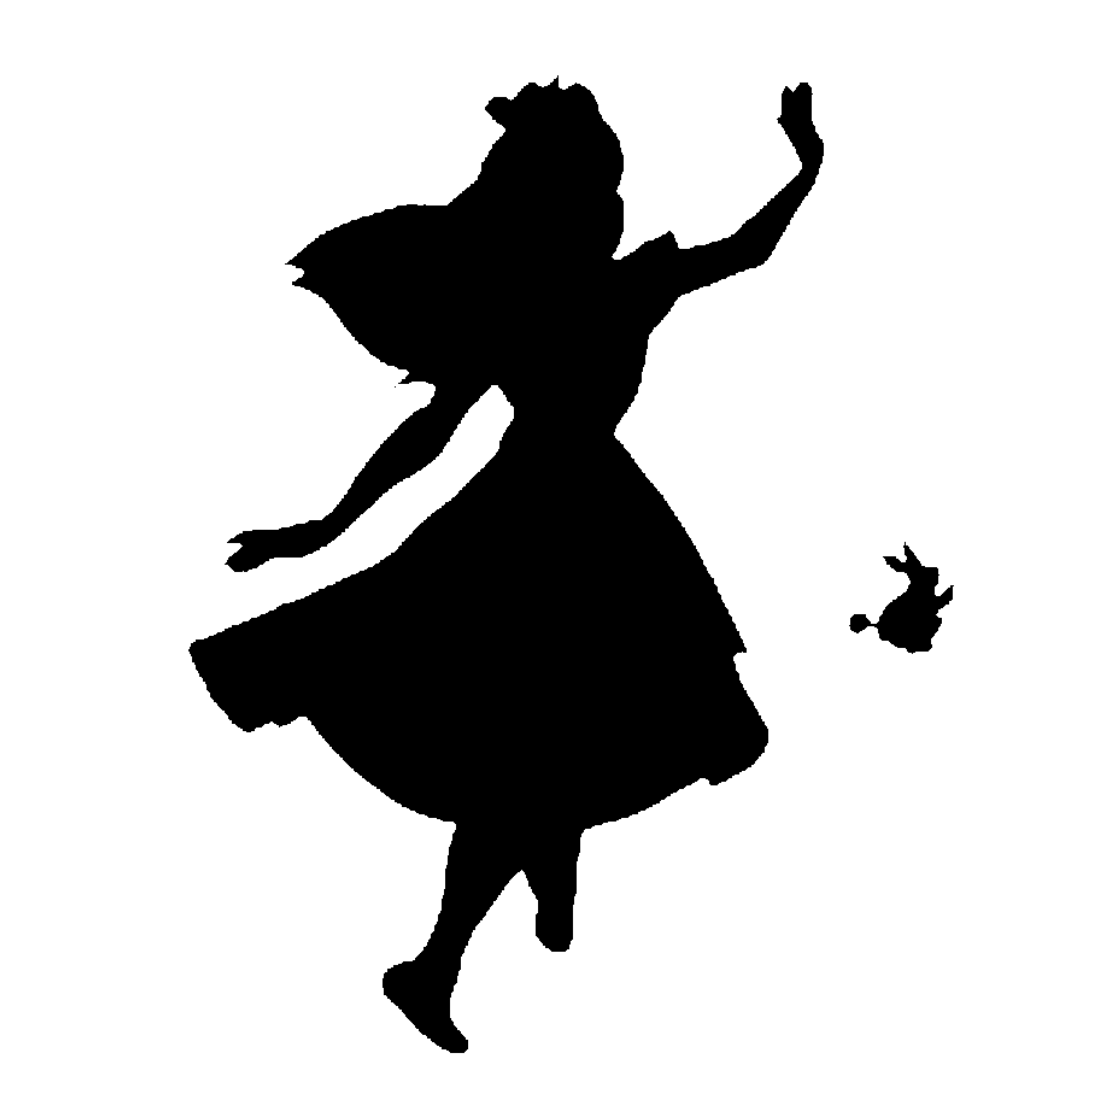

In [16]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

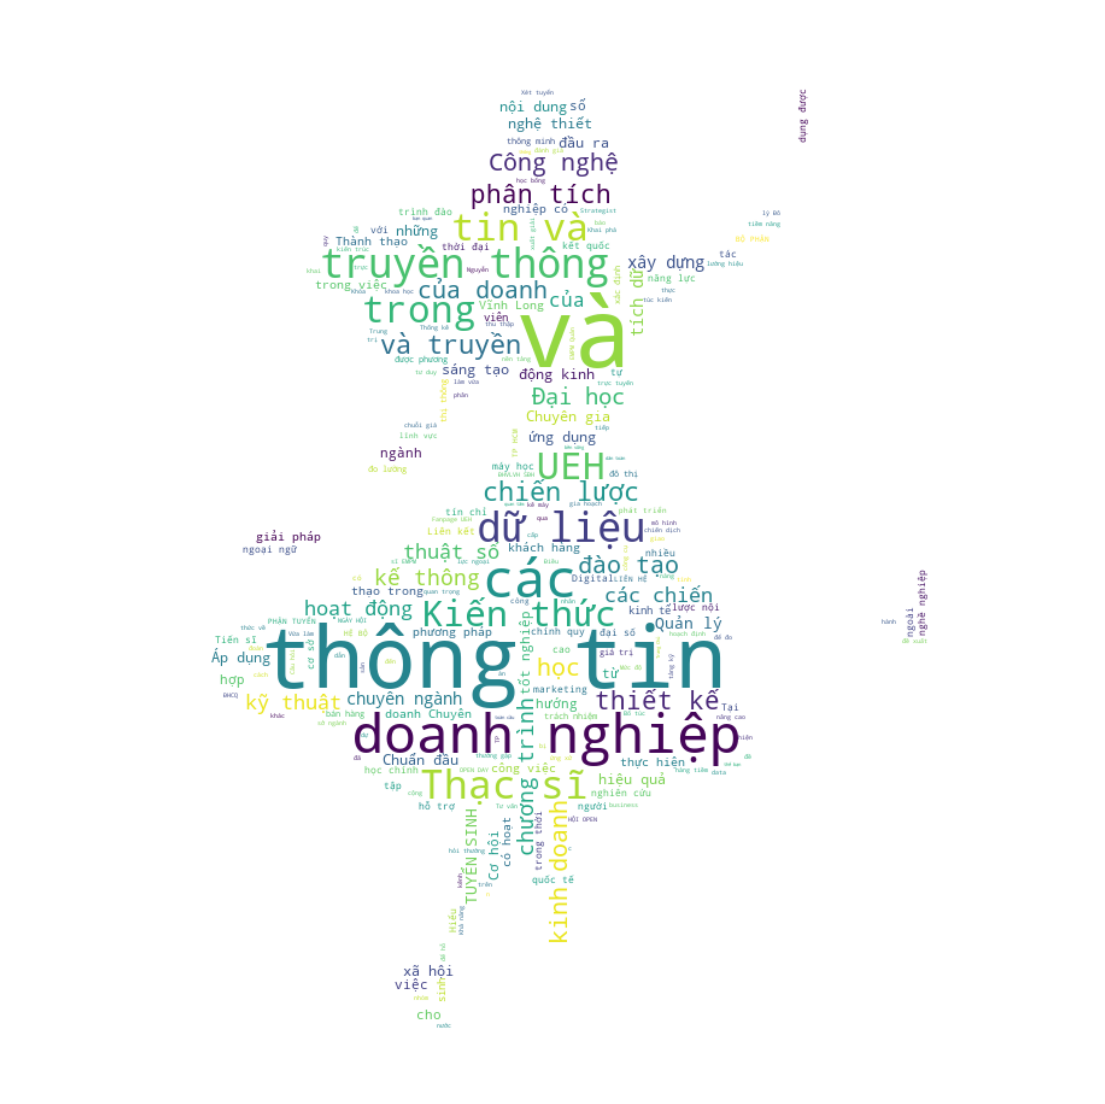

In [17]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(data_to_analysis)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!